# 1. Data Exploration

In [1]:
# Get the needed libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Train Data
dataframe = pd.read_csv('../data/01_raw/smoke_detection_1.csv', index_col=[0])

# Load 2nd Dataset
dataframe_2 = pd.read_csv('../data/01_new_data/smoke_detection_2.csv', index_col=[0])

## 1.1 Variable Identification

In [3]:
#We check the first 5 rows for a quick overview
dataframe.head(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654712187,27.45,43.27,48,488,12844,20723,937.586,2.04,2.12,14.05,2.191,0.049,0,0
1,1654712188,27.41,43.54,32,457,12857,20743,937.589,2.16,2.24,14.83,2.313,0.052,1,0
2,1654712189,27.36,43.76,34,455,12857,20747,937.604,2.19,2.28,15.07,2.350,0.053,2,0
3,1654712190,27.32,43.84,29,454,12858,20752,937.610,2.24,2.32,15.39,2.400,0.054,3,1
4,1654712191,27.27,43.98,28,456,12860,20751,937.601,2.26,2.35,15.58,2.429,0.055,4,1


In [4]:
dataframe.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

### What variables are present and how do they help us predict fire?

- **UTC**: Represents the timestamp in seconds in UTC time.
- **Temperature[C]**: Represents the air temperature. This variable can help detect fire by measuring changes in the environment.
- **Humidity[%]**: Represents the air humidity. Similar to air temperature, this variable shows changes in the environment to detect the presence of fire.
- **TVOC[ppb]**: Represents the total volatile organic compounds concentration measured in parts per billion. High TVOC levels can indicate the presence of combustion/burning byproducts.
- **eCO2[ppm]**: Represents the equivalent CO2 concentration in parts per million. Similar to TVOC, high eCO2 levels can indicate the presence of combustion byproducts.
- **Raw H2**: Represents raw molecular hydrogen levels. It can indicate the presence of flammable gases.
- **Raw Ethanol**: Represents the presence of raw ethanol gas.
- **Pressure[hPa]**: Represents the air pressure in hectopascals. It can have an impact on the behavior of fire.
- **PM1.0 & PM2.5**: Represent the concentration of particulate matter in the air for sizes less than 1.0 µm (PM1.0) and between 1.0 µm and 2.5 µm (PM2.5). These measurements provide information about the presence of smoke or combustion particles in the air.
- **NC0.5, NC1.0 & NC2.5**: Represent the number concentration of particulate matter for three different sizes. Unlike PM, NC provides the actual number of particles in the air. These measurements also provide information about the presence of smoke or combustion particles.
- **Fire Alarm**: Serves as a binary label indicating the presence ("1") or absence ("0") of a fire.


# 1.2 Univariate Analysis

In [5]:
# descriptive statistics, data types and missing values
def dataset_infos(dataframe: pd.DataFrame = dataframe) -> pd.DataFrame:
    # descriptive statistics
    descriptives = dataframe.describe(include='all').T

    # data types column
    descriptives.insert(loc=0, column='dtype', value=dataframe.dtypes)
    
    # missing values
    missing = pd.concat([dataframe.isnull().sum(), dataframe.eq('').sum()], keys=['nulls','empty strings'], axis=1)
    
    return pd.merge(descriptives, missing, left_index=True, right_index=True)

dataset_infos(dataframe)

,dtype,count,mean,std,min,25%,50%,75%,max,nulls,empty strings
UTC,int64,31315.0,1.654740e+09,13844.409147,1.654712e+09,1.654735e+09,1.654743e+09,1.654751e+09,1.654762e+09,0,0
Temperature[C],float64,31315.0,1.134310e+01,16.618755,-2.201000e+01,-4.195000e+00,1.352000e+01,2.107800e+01,5.993000e+01,0,0
Humidity[%],float64,31315.0,4.909048e+01,7.970868,1.074000e+01,4.764000e+01,5.033000e+01,5.329000e+01,7.520000e+01,0,0
TVOC[ppb],int64,31315.0,1.931413e+03,7809.492729,0.000000e+00,1.220000e+02,9.730000e+02,1.187000e+03,6.000000e+04,0,0
eCO2[ppm],int64,31315.0,5.977381e+02,1578.197869,4.000000e+02,4.000000e+02,4.000000e+02,4.320000e+02,3.918500e+04,0,0
Raw H2,int64,31315.0,1.294200e+04,264.775520,1.066800e+04,1.282700e+04,1.292100e+04,1.310700e+04,1.380300e+04,0,0
Raw Ethanol,int64,31315.0,1.974706e+04,601.785712,1.531700e+04,1.943500e+04,1.950400e+04,2.006500e+04,2.141000e+04,0,0
Pressure[hPa],float64,31315.0,9.387903e+02,0.832706,9.366240e+02,9.387050e+02,9.388360e+02,9.395140e+02,9.398610e+02,0,0
PM1.0,float64,31315.0,7.596800e+01,778.028801,0.000000e+00,1.130000e+00,1.800000e+00,2.080000e+00,1.334669e+04,0,0
PM2.5,float64,31315.0,1.296798e+02,1524.625544,0.000000e+00,1.200000e+00,1.870000e+00,2.170000e+00,4.126298e+04,0,0


In [6]:
#Number of columns
len(dataframe.columns)

15

In [7]:
#Duplictaed rows
duplicate_count = dataframe.duplicated().sum()
print("duplicates raw", duplicate_count)

#without the count
wo_count=dataframe.drop("CNT", axis=1)
print("duplicates without count", wo_count.duplicated().sum())

duplicates raw 0
duplicates without count 0


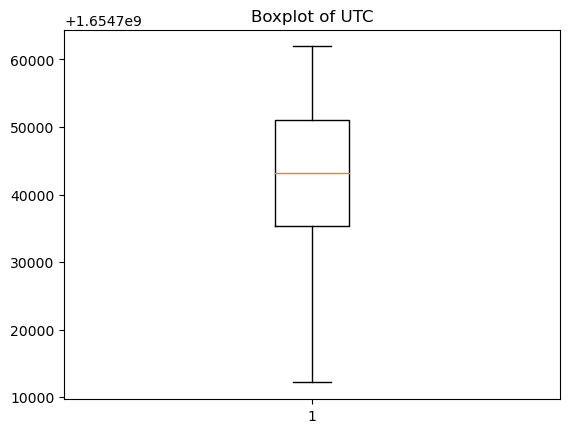

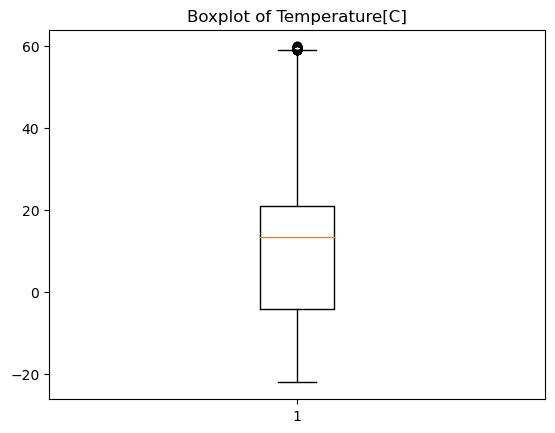

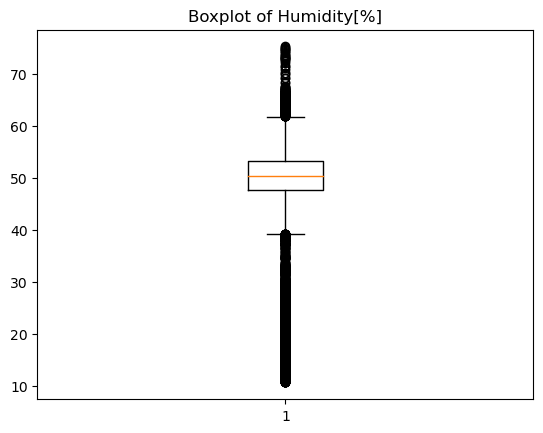

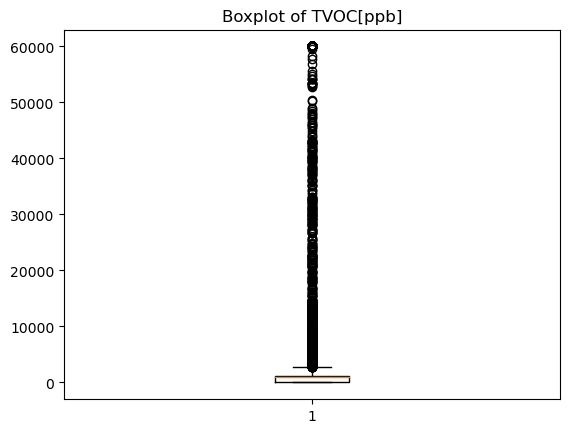

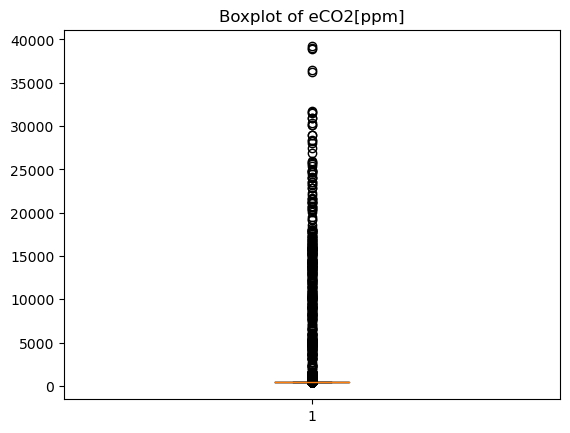

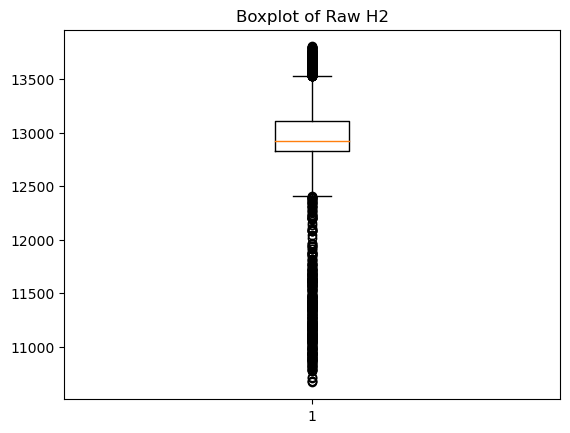

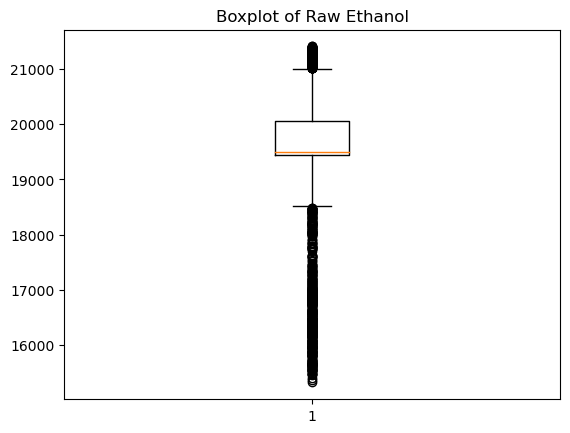

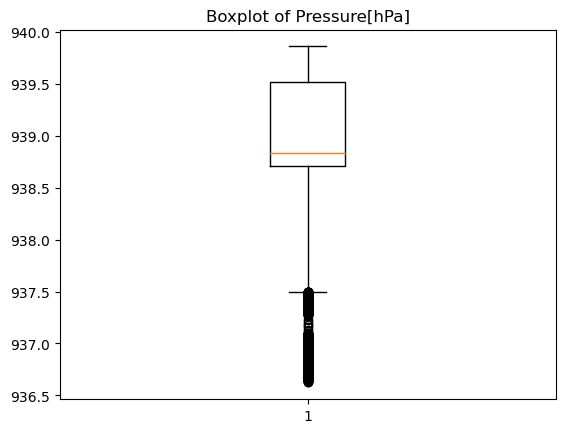

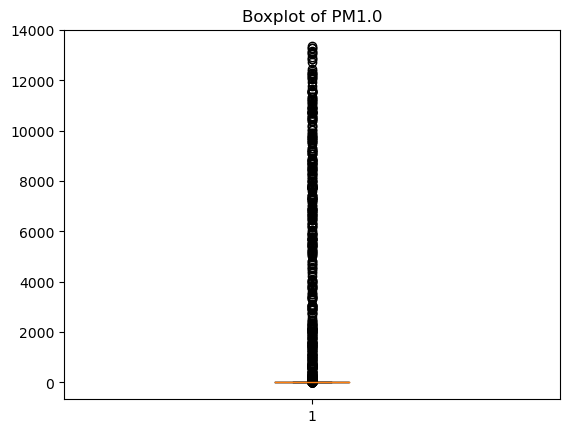

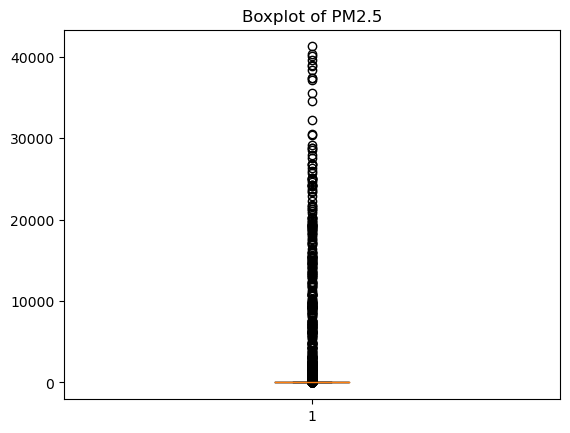

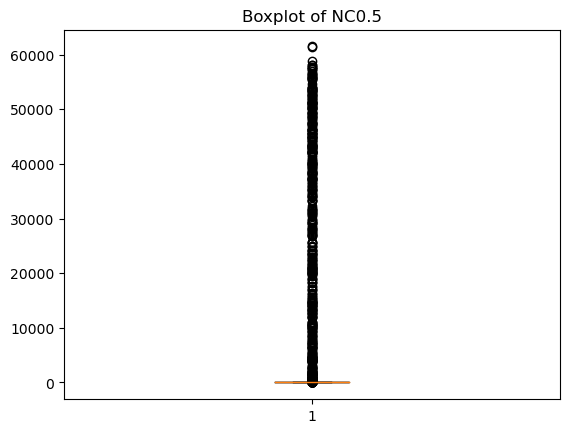

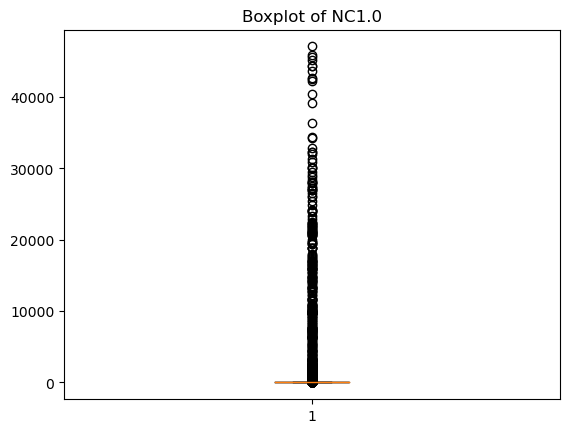

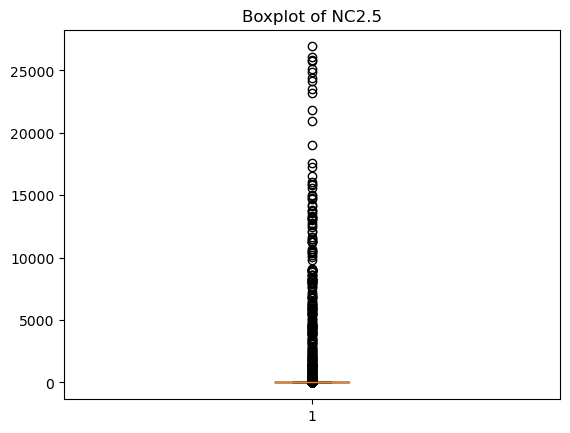

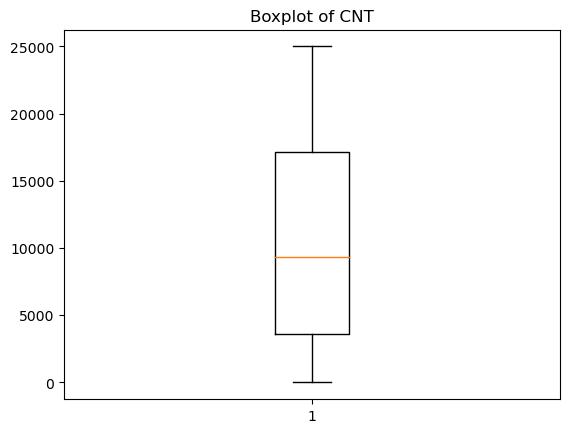

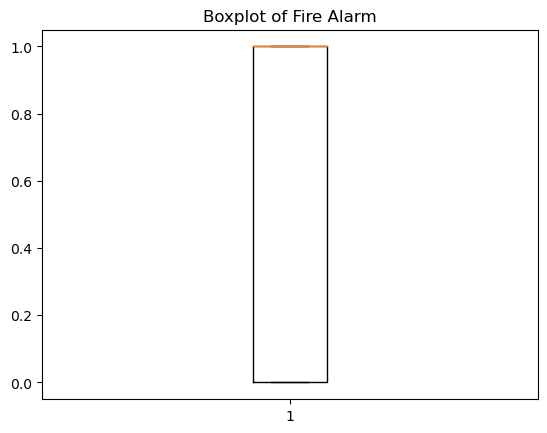

In [8]:
#Outlier detection using boxplots
for i in range(0,15):
    column_name = str(dataframe.columns[i])
    plt.boxplot(dataframe[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()

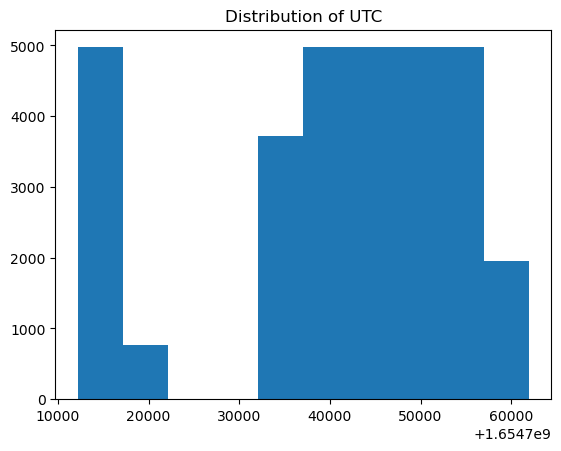

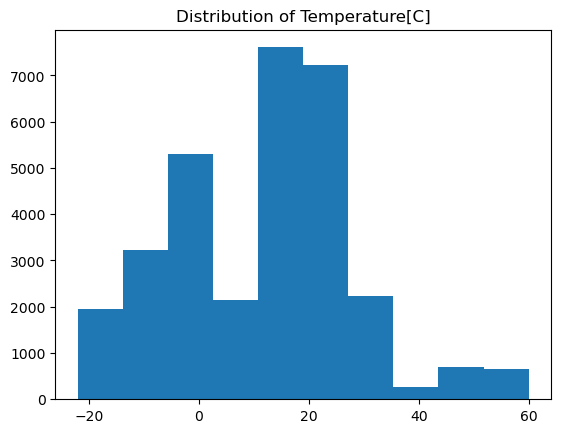

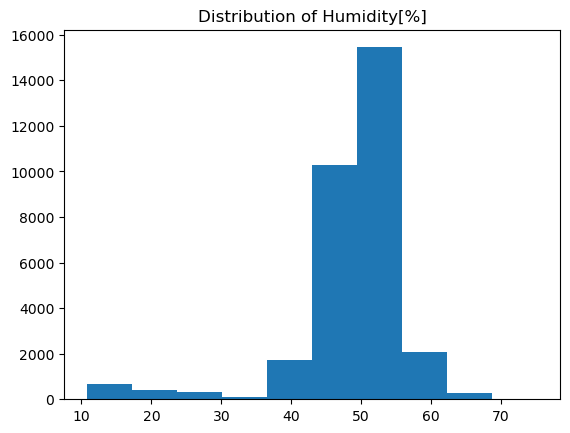

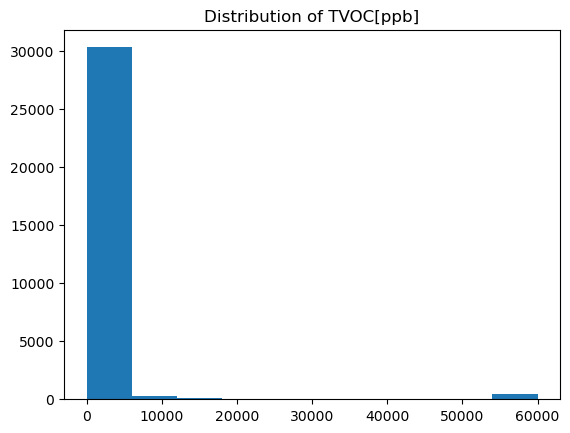

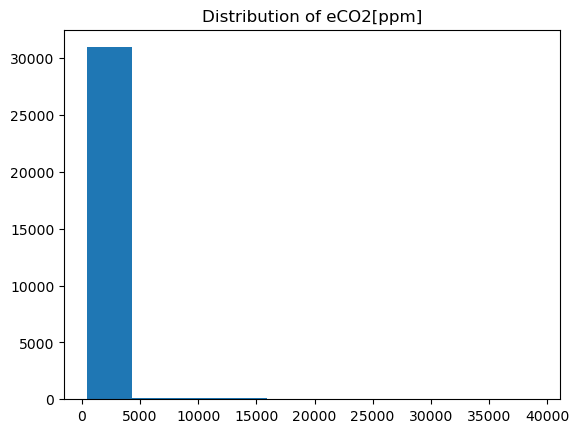

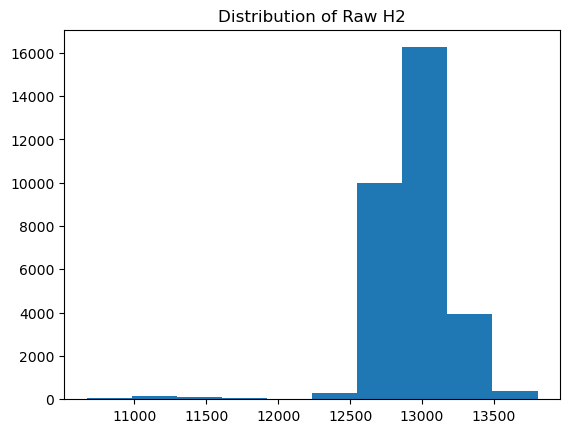

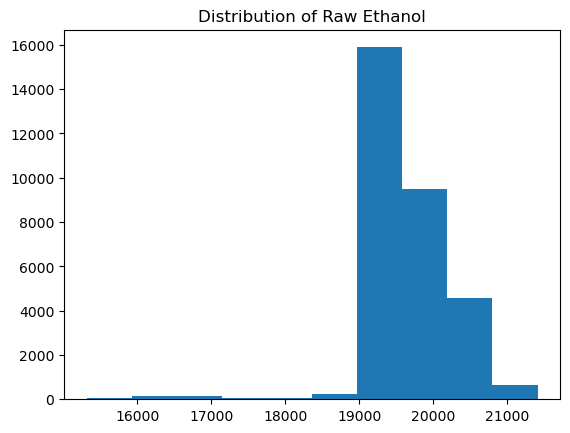

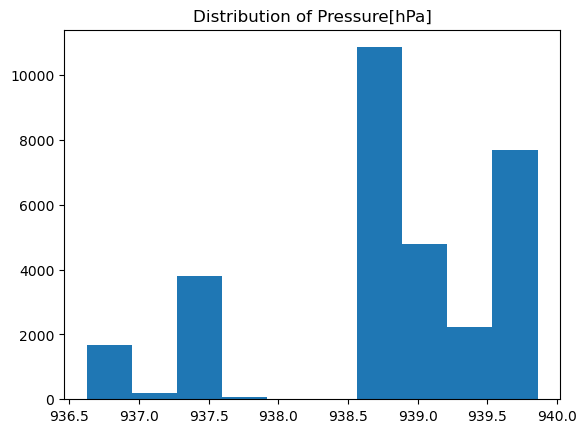

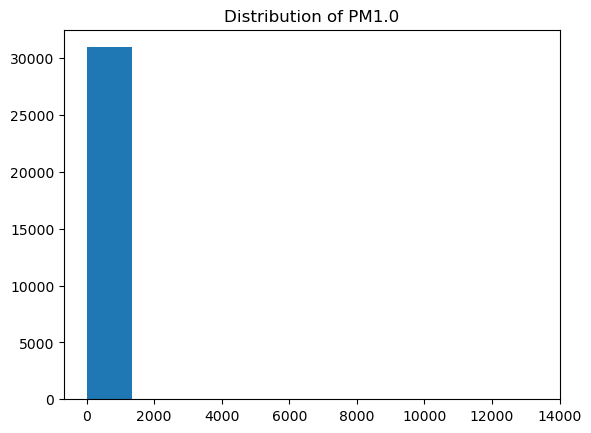

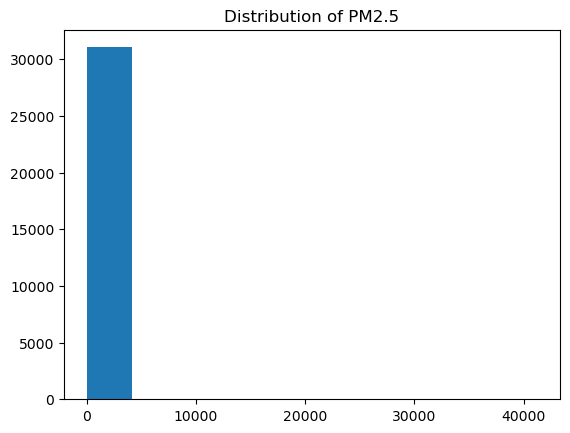

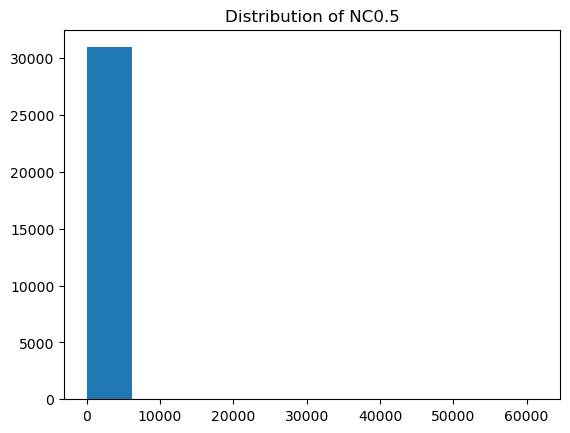

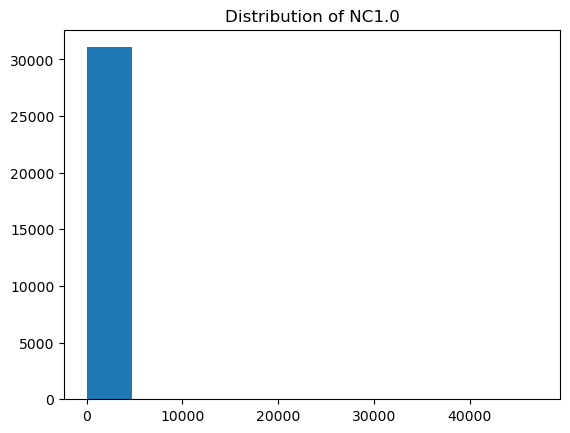

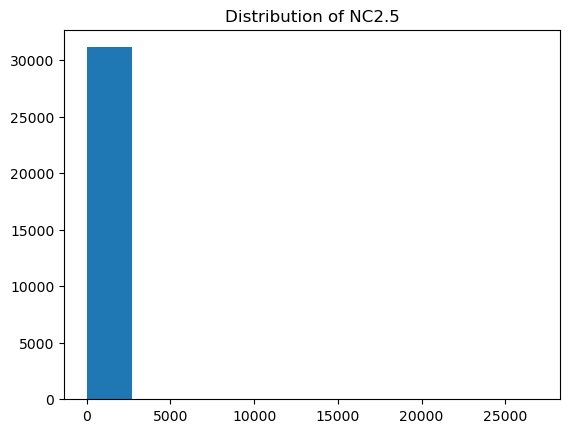

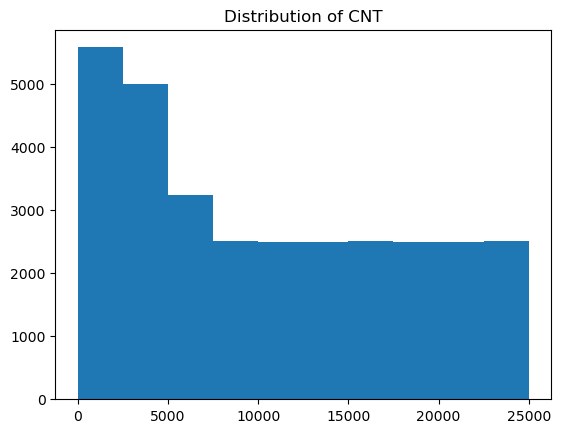

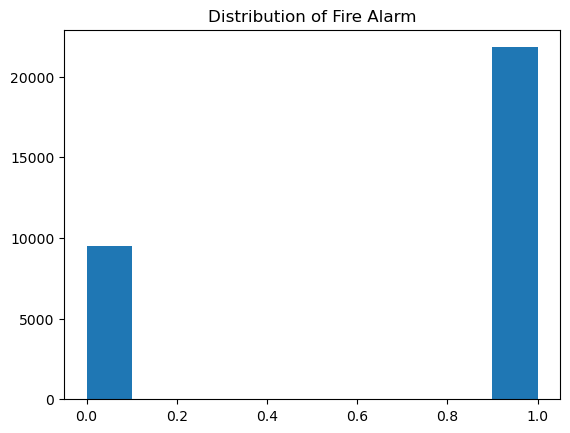

In [9]:
for i in range(0,15):
    column_name = str(dataframe.columns[i])
    plt.hist(dataframe[column_name], bins=10)  # Adjust the number of bins as needed

    plt.title(f'Distribution of {column_name}')

    plt.show()

### Findings 

- We see that we have 62.630 observations and 15 variables, which have been explored before
- Looking at the datatypes we see that we only have numerical data 
- We can also see that we do not have any missing values or empty strings in any of the variables
- Looking at the produces Boxplots we can see that we do have a lot of outliers
- Assessing the distributions of the timeframe three different time-buckets are showing. We will later split the dataset into these buckets to test for data drift
- The distribution of the variables is pretty heterogenous. Some variables are almost normally distributed while others are very skewed. One possible reason for this is the number of outliers
- Looking at the distribution of the label one can see that it is not 100% evenly distributed but that there are more "1" than "0" in the dataset


## 1.3 Bi-Variate Analysis

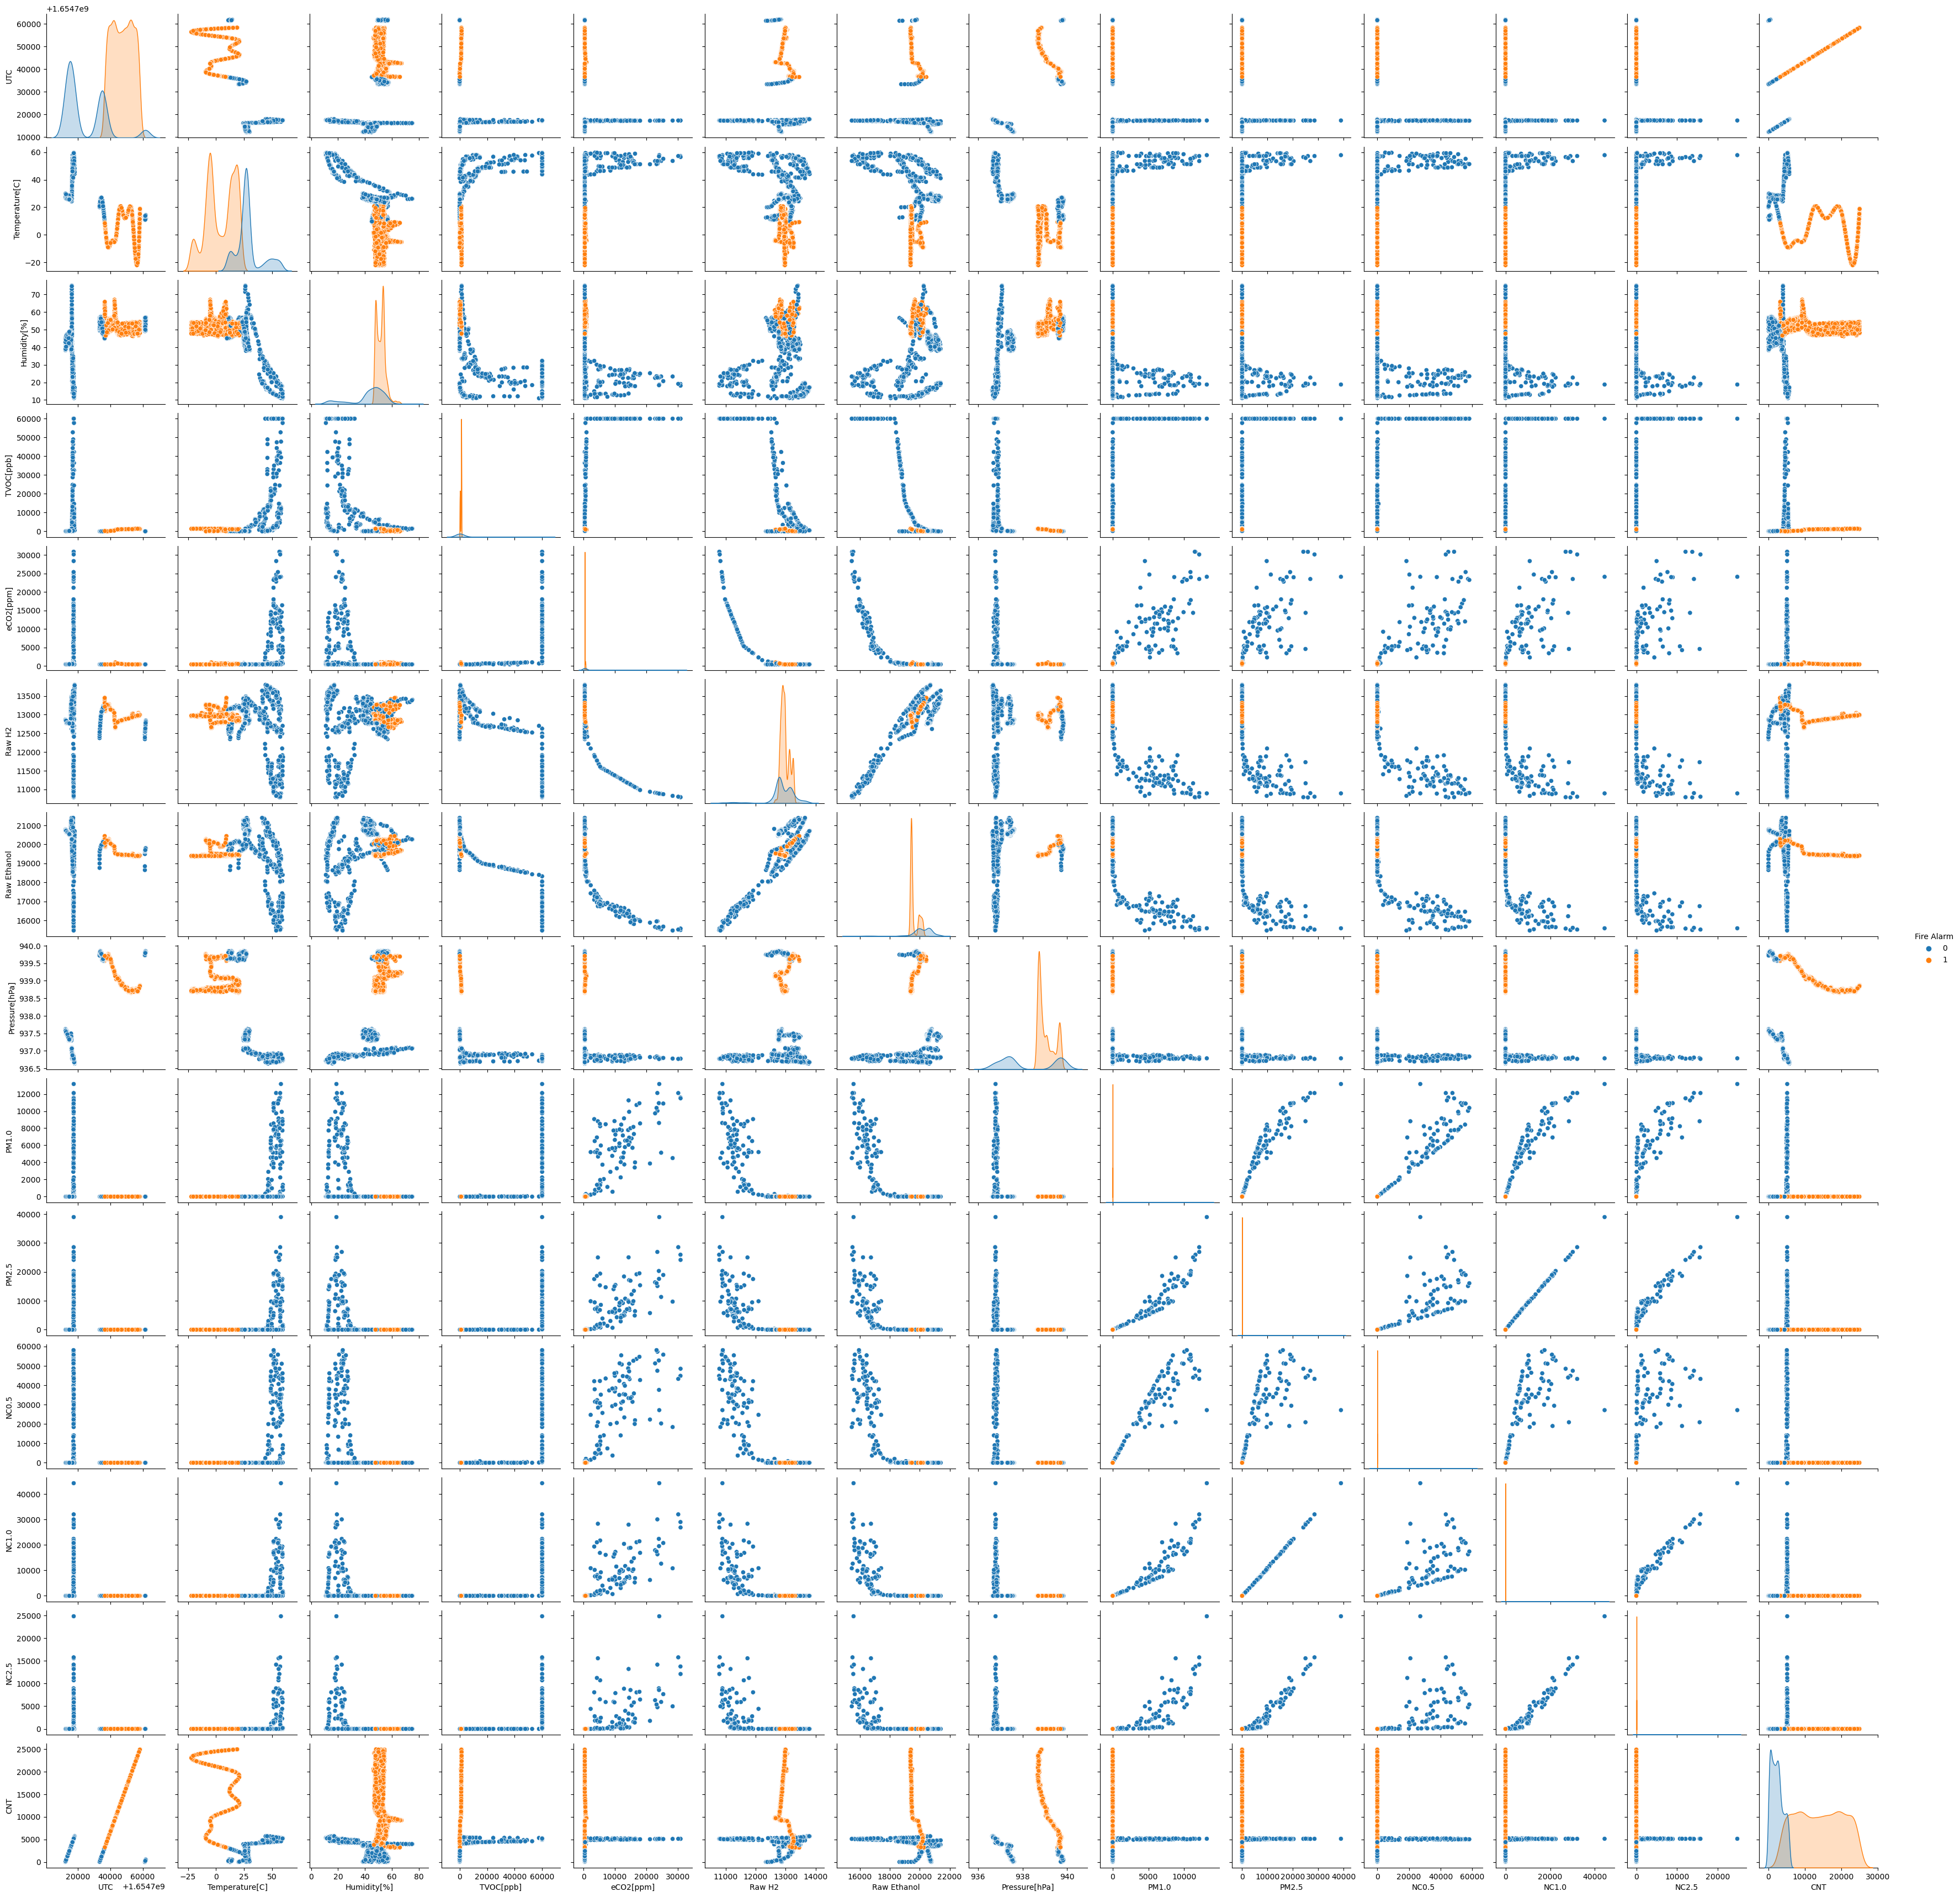

In [10]:
# For the pairplot only a sample of the data is used 
sample_df = dataframe.sample(frac=0.2, random_state=42)
sns.pairplot(sample_df, hue="Fire Alarm")

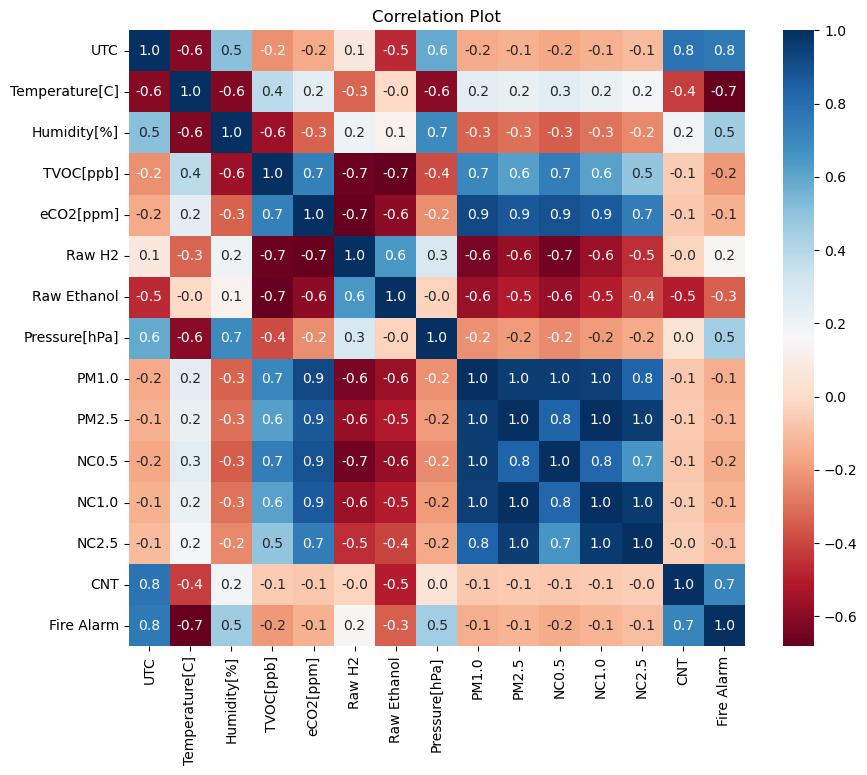

In [11]:
# Calculate the correlation matrix
correlation_matrix = dataframe.corr()

# Create the correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".1f", square=True)

# Set the title
plt.title("Correlation Plot")

# Display the correlation plot
plt.show()

### Findings
- From the pairplot no clear correlations can be read. Thus, a correlation matrix us used as well
- We can see that the humidity is positively correlated with the target variable 
- Also the raw ethanol shows a small negative correlation with the target variable 

## 1.4 Analysis of the label

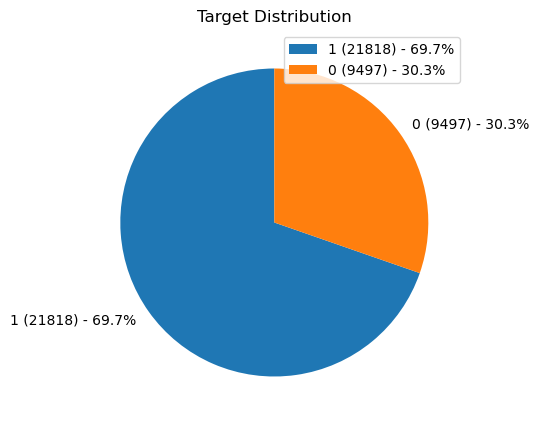

In [12]:
# plot target distribution (pie chart)
def plot_target_distribution(dataframe: pd.DataFrame, target='Fire Alarm'):
    plt.figure(figsize=(10, 5))
    value_counts = dataframe[target].value_counts()
    labels = value_counts.index
    counts = value_counts.values
    
    # Calculate percentages
    percentages = counts / counts.sum() * 100
    
    # Create pie chart with labels and percentages
    plt.pie(counts, labels=[f'{label} ({count}) - {percentage:.1f}%' for label, count, percentage in zip(labels, counts, percentages)],
            autopct='', startangle=90)
    
    plt.title('Target Distribution')
    plt.legend()
    plt.show()

plot_target_distribution(dataframe)

### Findings
- As we can see there is quite a havey imbalance in the dataset
- Thus over or undersampling techniques should be used for the training of the models

## 1.5 Analysis of the labels (Dataset 2)

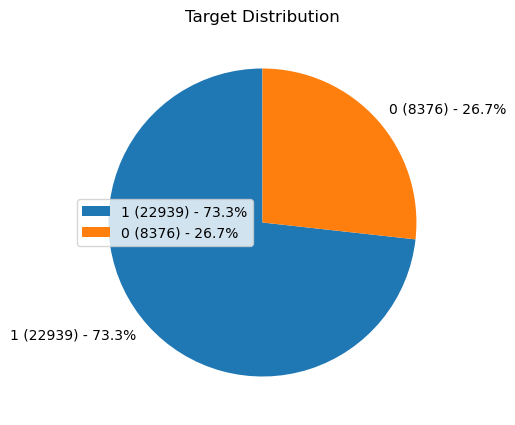

In [13]:
plot_target_distribution(dataframe_2)

### Findings
- We can see that in the second dataset the imbalance slightly more severe than in the first one